<a href="https://colab.research.google.com/github/clashgamer123/SOC_Pytorch/blob/main/mnist_autoencode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us create an AutoEncoder that encodes and decodes the standard MNIST data. <br>
import all the libraries

In [ ]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

Let us create our DataSet.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = 0.1307, std = 0.3087),
    transforms.Lambda(lambda x: x.view(-1))
])

batch_size = 64

mnist_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
data_loader = DataLoader(dataset = mnist_data, batch_size = batch_size, shuffle = True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 47730951.57it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2232093.12it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14395900.55it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3676288.84it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Now comes the main part. Let us implement the Autoencoder.

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

Now define the loss criteriona and the optimizer.

In [ ]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

Train the model.

In [ ]:
epochs = 10
for epoch in range(epochs):
  outputs = []
  cum_loss = 0
  # Let us append some images and their reformed images so as to check how close they are.
  for dataset in data_loader:
    image, label = dataset
    image = image.reshape(-1, 28*28)

    reformed_img = model(image)
    loss = criterion(reformed_img, image)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cum_loss += loss.item()*batch_size
    outputs.append((epoch, image, reformed_img))

  print(f'Epoch: {epoch+1}, Loss: {cum_loss/len(data_loader.dataset):.4f}')


Let us show the images plt and compare them.

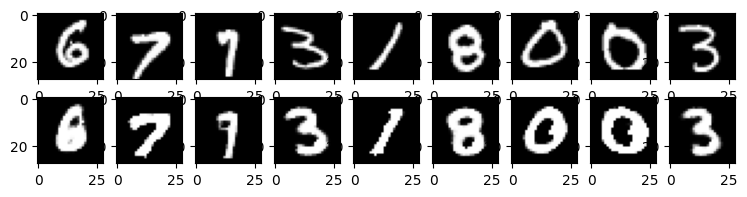

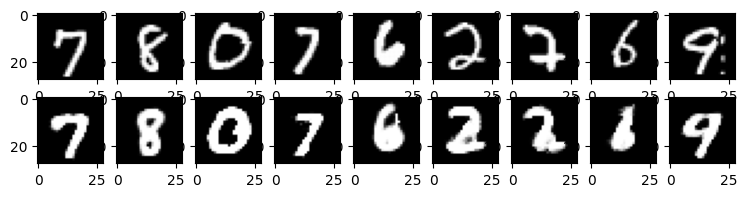

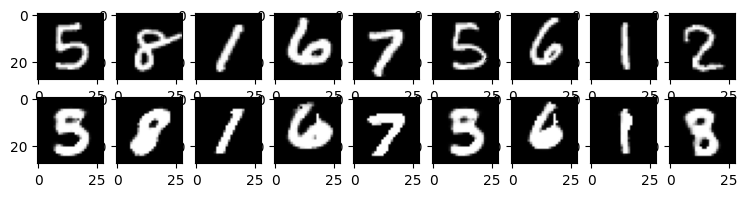

In [26]:
for k in range(0, epochs, 4):
  plt.figure(figsize = (9, 2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  reformed_imgs = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9:
      break
    plt.subplot(2, 9, i+1)
    plt.imshow(item.reshape(28, 28))

  for i, item in enumerate(reformed_imgs):
    if i >= 9:
      break
    plt.subplot(2, 9, 9+i+1)
    plt.imshow(item.reshape(28, 28))